## Neural Network demo on the Titanic dataset
#### Using the neural network that I've built, I am going to train it on the Titanic dataset, which contains data about a subset of people on Titanic, including if they survived or not.

##### Importing the libraries.

In [96]:
import pandas as pd
from NeuralNetwork.Preprocessing.OneHotEncoder import oneHotEncode
from sklearn.model_selection import train_test_split
from NeuralNetwork.NeuralNetwork import NeuralNetwork
import numpy as np
from matplotlib import pyplot as plt

##### Uploading the dataset and preprocessing it.
- Splitting the dataset into x and y.
- Dropping irelevant columns.
- One hot encoding the categorical features.
- Applying mean normalization.

In [79]:
dataset = pd.read_csv("Data\\titanic.csv")                     #load the dataset

y = dataset['Survived']                                        #split into dependent
x = dataset.drop(columns=['Survived'])                         #          and independent variables

x = x.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin']) #drop the redundant features
x = pd.get_dummies(x, columns=['Pclass', 'Sex', 'Embarked'])   #one hot encode the categorial features

x['Age'].fillna(x['Age'].mean(), inplace=True)                 #fill missing values in Age and Fare  
x['Fare'].fillna(x['Fare'].mean(), inplace=True)               # with their mean value, so the distribution doesn't change

x=(x-x.mean())/x.std()                                         #mean normalization

x, y = x.values, y.values                                      #convert to numpy arrays

##### Dataset preview.

In [70]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Splitting the data into training and test sets. (80% for training, 20% for testing)

In [71]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.2)

#### Neural Network parameters:
- Fully connected network, 12 neurons as input, two hidden layers with 32 and 4 neurons and one neuron for output.
- Binary crossentropy (log loss) as cost function.
- Sigmoid as activation function.
- Batch gradient descend for backpropagation.
- Batch size: 16
- Learning rate:0.4 
- Lambda (regularization parameter):0.01
- Dropout probability:0.1

##### Creating the neural network.

In [128]:
nn = NeuralNetwork([12,16,8,1],'sigmoid','cross-entropy',weightsRange=[-0.1,0.1])

##### Training the network with the parameters specified above.
- Before training, the network splits the data in 80% training and 20% validation.

In [129]:
history = nn.fit(xtr,ytr,batchSize=16,epochs=400,learningRate=0.4,lmbda=0.01,dropout=0.1,verbose=True)

Training on 569 samples, validating on 143.
Epoch 0. Loss train 0.6711645051822093; validation 0.6363916549323816. 
Epoch 1. Loss train 0.6713548999335256; validation 0.6336348539814969. 
Epoch 2. Loss train 0.6713588638900586; validation 0.6334061122135178. 
Epoch 3. Loss train 0.6713340680850239; validation 0.633366898826175. 
Epoch 4. Loss train 0.6713065718491859; validation 0.6333429238913434. 
Epoch 5. Loss train 0.6712784095905425; validation 0.6333199079159532. 
Epoch 6. Loss train 0.6712495668534363; validation 0.633296529669139. 
Epoch 7. Loss train 0.6712198543306914; validation 0.6332725243655083. 
Epoch 8. Loss train 0.6711890591149211; validation 0.6332477074055889. 
Epoch 9. Loss train 0.6711569543500588; validation 0.6332218920396351. 
Epoch 10. Loss train 0.6711232969965447; validation 0.6331948803140689. 
Epoch 11. Loss train 0.6710878242762885; validation 0.6331664598242279. 
Epoch 12. Loss train 0.671050249579541; validation 0.6331364006472252. 
Epoch 13. Loss train

Epoch 111. Loss train 0.43510078710341926; validation 0.46150400814703246. 
Epoch 112. Loss train 0.4348420756325598; validation 0.46131749217278073. 
Epoch 113. Loss train 0.4345902426784035; validation 0.4611340145279639. 
Epoch 114. Loss train 0.43434497088072965; validation 0.4609535982892516. 
Epoch 115. Loss train 0.43410597203786017; validation 0.4607762676252868. 
Epoch 116. Loss train 0.43387298400049407; validation 0.4606020464609294. 
Epoch 117. Loss train 0.4336457677596488; validation 0.46043095734816636. 
Epoch 118. Loss train 0.4334241047504445; validation 0.46026302052713336. 
Epoch 119. Loss train 0.43320779438327905; validation 0.46009825316225206. 
Epoch 120. Loss train 0.43299665180574165; validation 0.459936668739125. 
Epoch 121. Loss train 0.43279050589222395; validation 0.459778276608007. 
Epoch 122. Loss train 0.4325891974533712; validation 0.45962308165966215. 
Epoch 123. Loss train 0.4323925776540552; validation 0.4594710841194398. 
Epoch 124. Loss train 0.432

Epoch 221. Loss train 0.4239785683870804; validation 0.4537324434910908. 
Epoch 222. Loss train 0.4239401622622791; validation 0.4537136372609536. 
Epoch 223. Loss train 0.4239020314773809; validation 0.4536950492707749. 
Epoch 224. Loss train 0.4238641643614388; validation 0.4536766703520364. 
Epoch 225. Loss train 0.42382654944239395; validation 0.4536584914075611. 
Epoch 226. Loss train 0.42378917544224354; validation 0.45364050340695566. 
Epoch 227. Loss train 0.4237520312723434; validation 0.45362269738227085. 
Epoch 228. Loss train 0.4237151060288494; validation 0.45360506442386533. 
Epoch 229. Loss train 0.42367838898830157; validation 0.45358759567645507. 
Epoch 230. Loss train 0.4236418696033541; validation 0.45357028233533736. 
Epoch 231. Loss train 0.42360553749865326; validation 0.45355311564277556. 
Epoch 232. Loss train 0.4235693824668633; validation 0.453536086884536. 
Epoch 233. Loss train 0.42353339446484345; validation 0.4535191873865644. 
Epoch 234. Loss train 0.4234

Epoch 330. Loss train 0.41975895022528514; validation 0.45120412397384657. 
Epoch 331. Loss train 0.41971063650865525; validation 0.45116197288524656. 
Epoch 332. Loss train 0.41966209097355495; validation 0.4511193196569595. 
Epoch 333. Loss train 0.41961331495100607; validation 0.4510761650875666. 
Epoch 334. Loss train 0.41956430983325094; validation 0.451032510125005. 
Epoch 335. Loss train 0.4195150770690725; validation 0.4509883558557157. 
Epoch 336. Loss train 0.41946561815895544; validation 0.4509437034934178. 
Epoch 337. Loss train 0.4194159346501024; validation 0.4508985543675658. 
Epoch 338. Loss train 0.419366028131322; validation 0.45085290991154825. 
Epoch 339. Loss train 0.41931590022780435; validation 0.4508067716506864. 
Epoch 340. Loss train 0.41926555259580345; validation 0.45076014119009583. 
Epoch 341. Loss train 0.4192149869172476; validation 0.45071302020247356. 
Epoch 342. Loss train 0.4191642048942992; validation 0.4506654104158739. 
Epoch 343. Loss train 0.419

##### Predicting for the test set, computing accuracy, recall and precision.

In [130]:
pred = nn.predict(xts).T                                     #prediction for the test set                               
acc = sum((pred.reshape(yts.shape) > 0.5) == yts)/len(yts)   #accuracy

truePos, falsePos, pos = 0,0,0
for predVal,actVal in zip(pred.reshape(yts.shape) > 0.5,yts):
    truePos += (actVal == 1 and predVal == 1)
    falsePos += (actVal == 0 and predVal == 1)
    pos += actVal
precision = truePos / (truePos + falsePos)                   #precision
recall = truePos / pos                                       #recall

print("Accuracy: {}.".format(acc))
print("Precision: {}, Recall: {}.".format(precision,recall))

Accuracy: 0.8100558659217877.
Precision: 0.8653846153846154, Recall: 0.625.


#### Preview of the neural network learning curve.

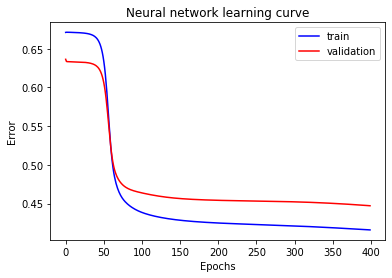

In [131]:
trainLoss = [epoch['trainLoss'] for epoch in history]
valLoss = [epoch['validationLoss'] for epoch in history]

plt.plot([i for i in range(len(trainLoss))],trainLoss,c = 'b',label='train')
plt.plot([i for i in range(len(valLoss))], valLoss,c = 'r',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Neural network learning curve")
plt.show()